# Desafios da aula03

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

# Baixando a base de dados
imdb = pd.read_csv("https://raw.githubusercontent.com/ViniViniAntunes/QuarentenaDados/master/datasets/microdados_enem/movie_metadata.csv")

# Configurando o estilo dos gráficos
sns.set_style("whitegrid")

# Desafio 1

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

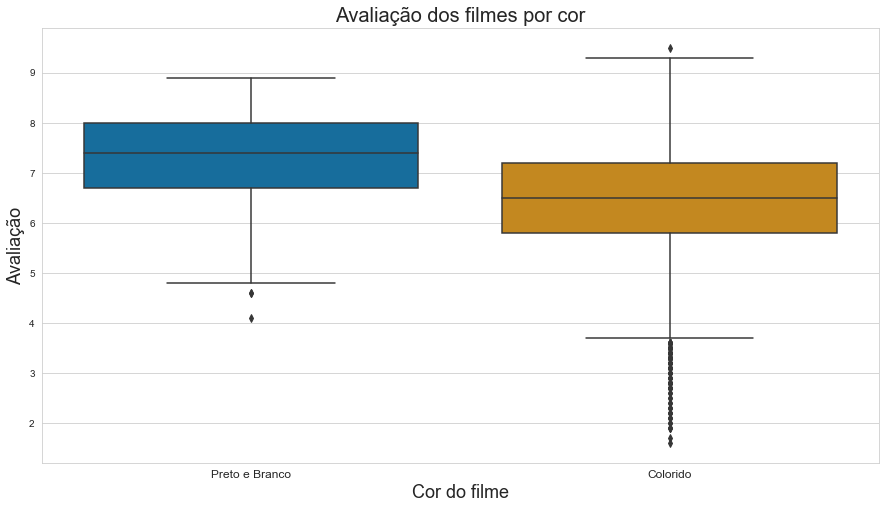

In [2]:
# Selecionando os dados
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_or_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_or_1"].value_counts()
color_or_bw.groupby("color").median()["imdb_score"]

# Tamanho da figura
plt.figure(figsize=(15, 8))

# Plotando o gráfico boxplot com a seaborn
sns.boxplot(data=color_or_bw.query("color_0_or_1 in [0,1]"), 
            x='color_0_or_1', y='imdb_score', 
            palette=sns.color_palette("colorblind")
           ).set_xticklabels(labels=["Preto e Branco", "Colorido"])

# Definindo o título
plt.title('Avaliação dos filmes por cor', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel("Cor do filme", fontsize=18)

# Definindo o eixo vertical
plt.ylabel("Avaliação", fontsize=18)

# Rotacionando os gêneros em 45°
plt.xticks(fontsize=12)

plt.show();

Filmes em Preto e Branco têm, em média, avaliações maiores que filmes Coloridos. Por serem filmes mais antigos ou mais conceituais/cults, o seu público é menor. Com menos avaliações, mais provável aparecerem um maior número de notas altas.

# Desafio 2 
Descubra qual é o filme em nosso dataset com o maior prejuízo.

Para resolver esse desafio, criei uma coluna "lucro" com os valores de faturamento bruto ("gross") menos as despesas ("budget"). Depois ordenei em ordem crescente e selecionei o primeiro (o menor lucro).

In [3]:
# Fazendo uma cópia do DataFrame
imdb_copia = imdb.copy()

# Retirando os valores duplicados
imdb_copia = imdb_copia.drop_duplicates()

# Selecionando somente os filmes americanos para que o budget e o gross não sejam influenciados por valores em outras moedas
imdb_usa = imdb_copia.query("country == 'USA'")

# Criando uma coluna para o lucro dos filmes
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

# Selecionando o filme com maior prejuízo
filme_com_maior_prejuizo = imdb_usa[['movie_title', 'lucro']].sort_values(by='lucro').head(1)

# Limpando a string com o nome do filme e armazenando em uma variável
nome = filme_com_maior_prejuizo['movie_title'].values[0].split('\xa0')[0]

# Armazenando em uma variável o valor absoluto do lucro (lucro negativo = prejuízo)
prejuizo = abs(filme_com_maior_prejuizo['lucro'].values[0].round(2))

# Mostrando o nome do filme com o maior prejuízo
print(f'O filme com maior prejuízo foi {nome} com um prejuízo de U$ {prejuizo}')

O filme com maior prejuízo foi John Carter com um prejuízo de U$ 190641321.0


# Desafio 3
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

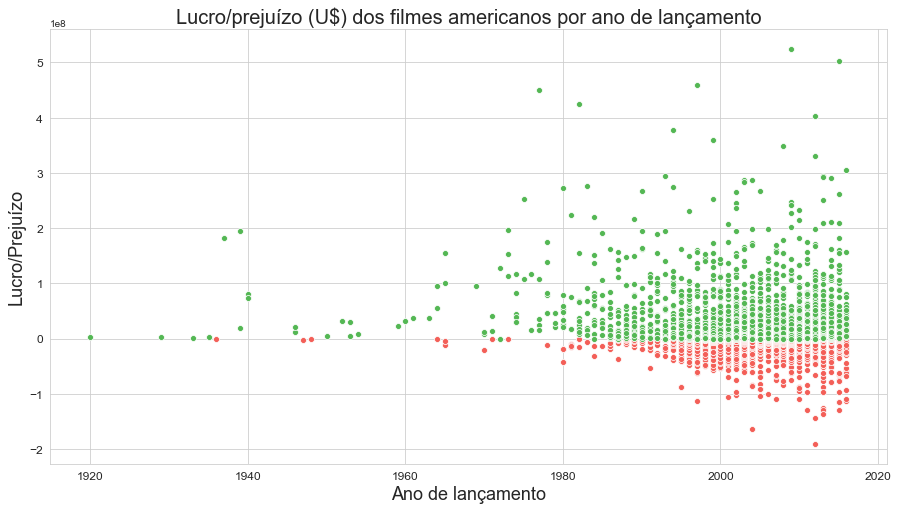

In [4]:
# Selecionando os filmes sem lucro
filmes_sem_lucro = imdb_usa[['title_year', 'lucro']].query('lucro <= 0')

# Selecionando os filmes com lucro
filmes_com_lucro = imdb_usa[['title_year', 'lucro']].query('lucro > 0')

# Tamanho da figura
plt.figure(figsize=(15, 8))

# Plotando o gráfico boxplot com a seaborn
sns.scatterplot(x="title_year", y="lucro", data = filmes_sem_lucro,
                color='#F35F58')

sns.scatterplot(x="title_year", y="lucro", data = filmes_com_lucro,
                color='#54B754')

# Definindo o título
plt.title('Lucro/prejuízo (U$) dos filmes americanos por ano de lançamento', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel("Ano de lançamento", fontsize=18)

# Definindo o eixo vertical
plt.ylabel("Lucro/Prejuízo", fontsize=18)

# Configurando o tamanho com ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Configurando a legenda (?)
#plt.legend(loc='upper left')

plt.show();

Os maiores prejuizos aconteceram nos filmes mais recentes.


# Desafio 4
Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [5]:
# Selecionando os filmes da década pré-guerra
filmes_pre_guerra = imdb_usa.query('title_year < 1940')

# Mostrando os top 2 filmes antes de 2ª guerra com maior lucro
filmes_pre_guerra[['movie_title', 'lucro']].sort_values(by='lucro', ascending=False).head(2)

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0


# Desafio 5 

No gráfico de **"filmes_irmaos por faturamento bruto"** temos alguns pontos estranhos entre 15 e 20. Descubra quem é o diretor 

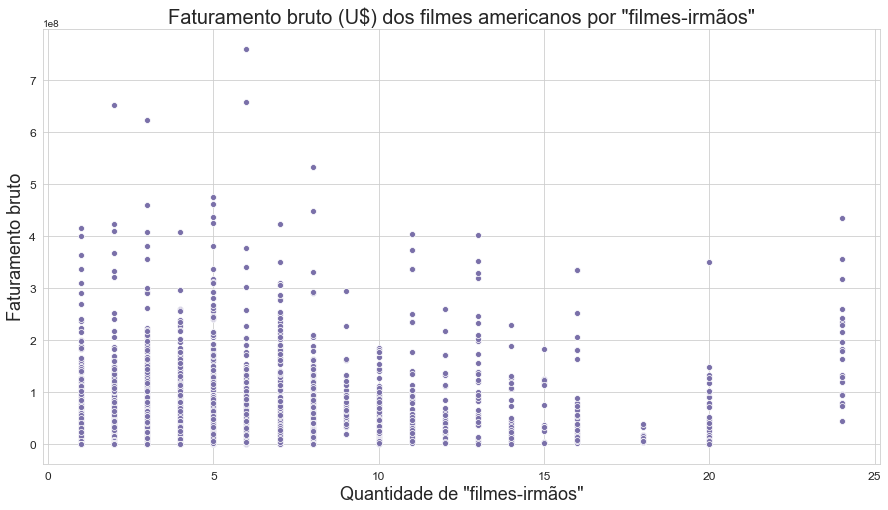

In [6]:
# Contando quantos "filmes-irmãos" para cada filme (entende-se "filmes-irmãos" como sendo filmes feitos pelo mesmo diretor)
filmes_por_diretor = imdb_usa['director_name'].value_counts()

# Juntando faturamento e a quantidade de filmes para cada diretor
gross_director = imdb_usa[['director_name', 'gross']].set_index('director_name').join(filmes_por_diretor, on='director_name')

# Renomeando a colunas
gross_director.columns = ['faturamento', 'filmes_irmaos']

# Tamanho da figura
plt.figure(figsize=(15, 8))

# Plotando o gráfico faturamento (U$) por "filmes-irmãos" com a seaborn
sns.scatterplot(x='filmes_irmaos', y='faturamento', data=gross_director, color='#7A70A9');

# Definindo o título
plt.title('Faturamento bruto (U$) dos filmes americanos por "filmes-irmãos"', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel('Quantidade de "filmes-irmãos"', fontsize=18)

# Definindo o eixo vertical
plt.ylabel("Faturamento bruto", fontsize=18)

# Configurando o tamanho com ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show();

#### Os pontos estranhos são aqueles entre 15 e 20 "filmes-irmãos" que têm um faturamento mais baixo que os seus "vizinhos".

In [7]:
selecao = gross_director.reset_index().sort_values(by='filmes_irmaos', 
                                             ascending=False).query('filmes_irmaos > 16 & filmes_irmaos < 20')
# Mostrando o nome do diretor
print('O diretor com muitos filmes na carreira, porém com faturamento menor que os demais é:\n\n'
      f'\n\t\t\t\t{selecao["director_name"].values[0]}')

O diretor com muitos filmes na carreira, porém com faturamento menor que os demais é:


				Woody Allen


# Desafio 6 
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

Faturamento, despesas, lucro e ano de lançamento e suas correlações entre si


<Figure size 1080x576 with 0 Axes>

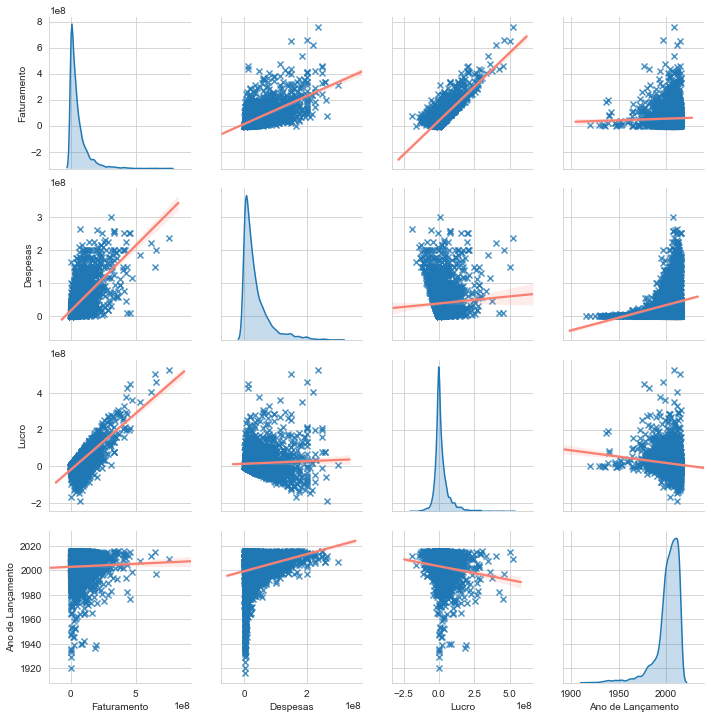

In [8]:
# Definindo uma função de plote os gráficos de correlação entre as grandezas faturamento, despesas, lucro e ano de lançamento
# Esse passo foi feito apenas para facilitar o próximo desafio
def plot_corr():
    
    # Tamanho da figura
    plt.figure(figsize=(15, 8))
    
    # Selecionando os dados para análise
    dados_correlacao = imdb_usa[["gross", "budget", "lucro", "title_year"]]
    
    # Renomeando as colunas do DataFrame selecionado
    dados_correlacao.columns = ['Faturamento', 'Despesas', 'Lucro', 'Ano de Lançamento']
    
    # Plotando os gráficos de correlação entre as grandezas faturamento, despesas, lucro e ano de lançamento com a seaborn
    sns.pairplot(data=dados_correlacao, palette="RdBu", markers='x',
                 kind='reg', diag_kind="kde", diag_kws=dict(shade=True), 
                 plot_kws={'line_kws':{'color':'#FA8072'}}
                );

    # Título
    print('Faturamento, despesas, lucro e ano de lançamento e suas correlações entre si')
    
    # Mostrando a figura
    plt.show();
    return

# Chamando a função plot_corr()
plot_corr()

#### Analisando os gráficos podemos fazer algumas observações interessantes, como:
<ul>
    <li>Filmes mais novos tende a ter o lucro menor. Provavelmente pois teveram menos tempo para conseguir aumentar seu lucro</li>
    <li>O investimento em filmes aumentou com o passar dos anos.</li>
    <li>Os filmes com as maiores despesas tendem a ter um maior faturamento.</li>
    <li>E os filmes com maior faturamento tendem a ter um lucro maior e também despesas.</li>
</ul>

# Desafio 7 
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [9]:
imdb_usa.query('title_year >= 2000')[['gross', 'budget', 'lucro', 'title_year']].corr().round(2)

,gross,budget,lucro,title_year
gross,1.00,0.71,0.77,0.11
budget,0.71,1.00,0.10,0.06
lucro,0.77,0.10,1.00,0.04
title_year,0.11,0.06,0.04,1.00


#### As duas correlações mais significativas são entre as grandezas despesas(budget) e o faturamento(gross) e as grandezas lucro e faturamento.

# Desafio 8

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

<Figure size 1080x576 with 0 Axes>

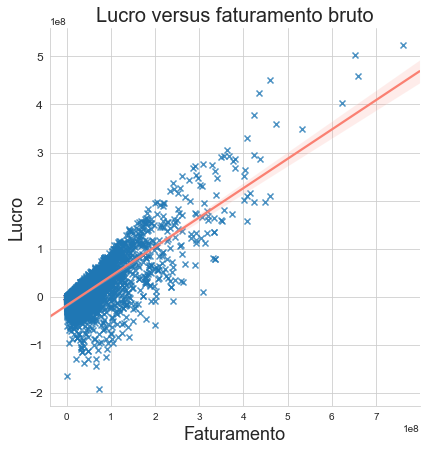

In [10]:
# Tamanho da figura
plt.figure(figsize=(15, 8));

# Plotando os gráficos de lucro por faturamento bruto com a seaborn
sns.pairplot(data=imdb_usa, y_vars='lucro', x_vars='gross', palette="RdBu", markers='x',
             height=6, kind='reg', diag_kind="kde", diag_kws=dict(shade=True), 
             plot_kws={'line_kws':{'color':'#FA8072'}}
            );

# Definindo os títulos
plt.title('Lucro versus faturamento bruto', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel("Faturamento", fontsize=18)

# Definindo o eixo vertical
plt.ylabel("Lucro", fontsize=18)

# Configurando o tamanho com ticks
plt.yticks(fontsize=12)

# Mostrando a figura
plt.show();

<Figure size 1080x576 with 0 Axes>

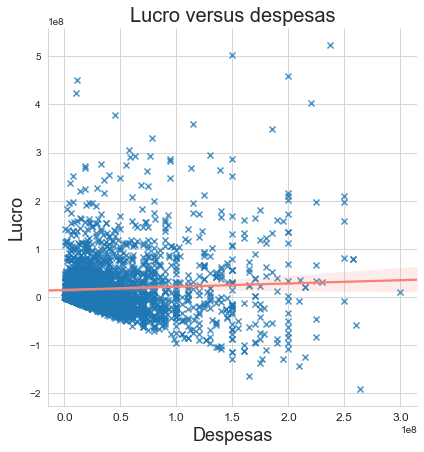

In [11]:
# Tamanho da figura
plt.figure(figsize=(15, 8))

# Plotando os gráficos de lucro por despesas com a seaborn
sns.pairplot(data=imdb_usa, y_vars='lucro', x_vars='budget', palette="RdBu", markers='x',
             height=6, kind='reg', diag_kind="kde", diag_kws=dict(shade=True), 
             plot_kws={'line_kws':{'color':'#FA8072'}}
            );

# Definindo os títulos
plt.title('Lucro versus despesas', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel("Despesas", fontsize=18)

# Definindo o eixo vertical
plt.ylabel("Lucro", fontsize=18)

# Configurando o tamanho com ticks
plt.xticks(fontsize=12)

# Mostrando a figura
plt.show();

# Desafio 9 

Analisar e interpretar a correlação de outras variáveis além das feitas em sala. Número de avaliações por ano pode ser uma boa.


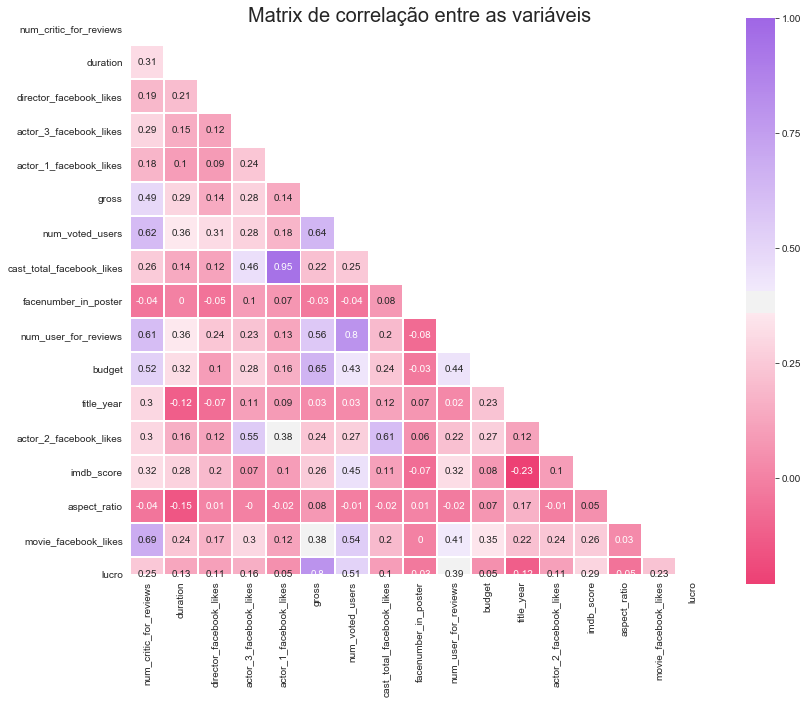

In [12]:
# Criando uma matriz de correlação com os dados do DataFrame "imdb-usa"
correlacao = imdb_usa.corr()

# Criando uma matriz triangular superior
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True

# Configurando o tamenho da figura
f, ax = plt.subplots(figsize=(13,13))

# Gerando um mapa de cores divergente personalizado
cmap = sns.diverging_palette(0, 1000, l=55, s=80, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
correlacao = imdb_usa.corr().round(2)
sns.heatmap(correlacao, mask=mask,
            square=True, linewidth=.9, cbar_kws={"shrink": .8}, 
            cmap=cmap, annot=True)

plt.title('Matrix de correlação entre as variáveis', fontsize=20)

plt.show()

### A correlação negativa mais forte é entre as notas atribuídas aos filmes e o seu ano de lançamento do filme

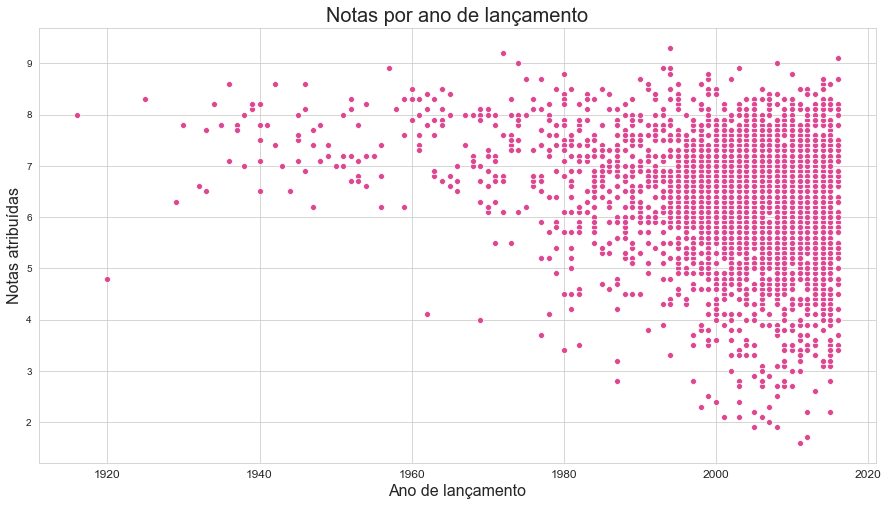

In [13]:
# Tamanho da figura
plt.figure(figsize=(15, 8))

# Plotando o gráfico notas por ano de lançamento com a seaborn
sns.scatterplot(x="title_year", y="imdb_score", data = imdb_usa[["imdb_score", "title_year"]], color='#DD4792')

# Definindo o título
plt.title('Notas por ano de lançamento', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel('Ano de lançamento', fontsize=16)

# Definindo o eixo vertical
plt.ylabel("Notas atribuídas", fontsize=16)

# Configurando o tamanho com ticks
plt.xticks(fontsize=12)

plt.show();

Os filmes antigos têm bem menos avaliações que os filmes mais recentes. Porém, suas notas são muito maiores.